In [1]:
import copy    
import numpy as np
import matplotlib.pyplot as plt
from PID import PID
import Medidas
import PSO
import pandas as pd
import warnings
from time import time

warnings.filterwarnings('ignore')

In [2]:
def sistema2df(sistema,path):
    iteracao = list()
    feature = list()
    passarinho = 0

    columns = ["P","I","D","P_pbest","I_pbest","D_pbest","P_gbest","I_gbest","D_gbest","V_p","V_i","V_d","erro","erro_gbest","I"]

    for passarinho in range(10):
        iteracao = list()
        for iter in range(len(sistema)):
            feature = list()

            feature.append(copy.deepcopy(sistema[iter][passarinho].X[0]))
            feature.append(sistema[iter][passarinho].X[1])
            feature.append(sistema[iter][passarinho].X[2])
            feature.append(sistema[iter][passarinho].pbest[0])
            feature.append(sistema[iter][passarinho].pbest[1])
            feature.append(sistema[iter][passarinho].pbest[2])
            feature.append(sistema[iter][passarinho].gbest[0])
            feature.append(sistema[iter][passarinho].gbest[1])
            feature.append(sistema[iter][passarinho].gbest[2])
            feature.append(sistema[iter][passarinho].V[0])
            feature.append(sistema[iter][passarinho].V[1])
            feature.append(sistema[iter][passarinho].V[2])
            feature.append(sistema[iter][passarinho].erro)
            feature.append(sistema[iter][passarinho].erro_gbest)
            feature.append(sistema[iter][passarinho].I)
            
            iteracao.append(feature)
        
        df = pd.DataFrame(iteracao, columns=columns)
        new_path = path + "/passarinho" + str(passarinho) + ".xlsx"
        df.to_excel(new_path)

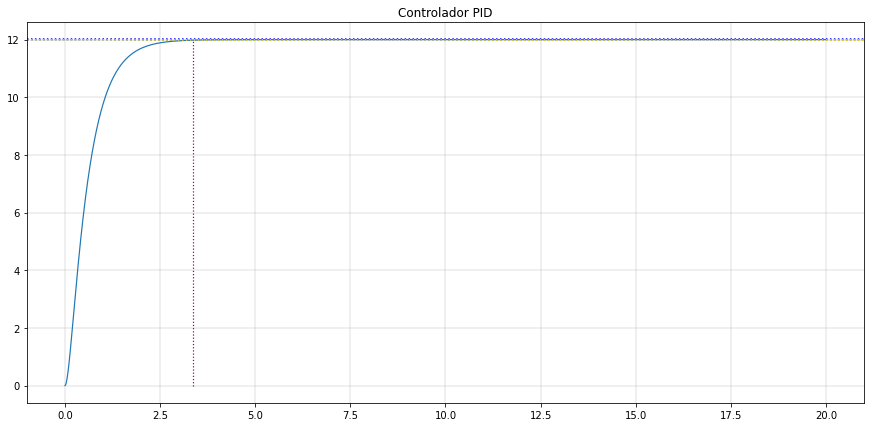

In [3]:
num = [200, 1200]
den = [1, 17, 80, 100]
set_point = 1.0

erro = list()
pid_param = list()

pid_param.append(num)
pid_param.append(den)
pid_param.append(set_point)

pid = PID(pid_param[0],pid_param[1])

erro.append(Medidas.Tempo_Acomodacao(pid, ma= True))
erro.append(Medidas.Overshoot(pid, ma = True))

Y,_ ,T = pid.resposta_MA()

pid.plot_MA(Y, T, erro)

<- particulas geradas aleatóriamente ->
particula aleatoria [0.2948492289583464, 0.21601930846482653, 0.4645080440530819]
particula aleatoria [0.15601486222891137, 0.03261147651031304, 0.6671800107886433]
particula aleatoria [6.676865321986567, 8.414179160019717, 2.2021824984885443]
particula aleatoria [9.733878158141883, 6.121460513729467, 7.060836468638806]
particula aleatoria [8.886055349467263, 4.647380081338877, 3.7581685106347766]
particula aleatoria [11.184938630794651, 39.50230249645307, 27.123145198680515]
particula aleatoria [16.654846306211066, 43.47402623632382, 15.064274281684824]
particula aleatoria [81.94484391508055, 97.55341491634991, 93.9058741320687]
particula aleatoria [57.29185355752484, 84.24292749311111, 58.86622807029757]
particula aleatoria [53.9281604249606, 91.01872146566743, 51.54839681802134]


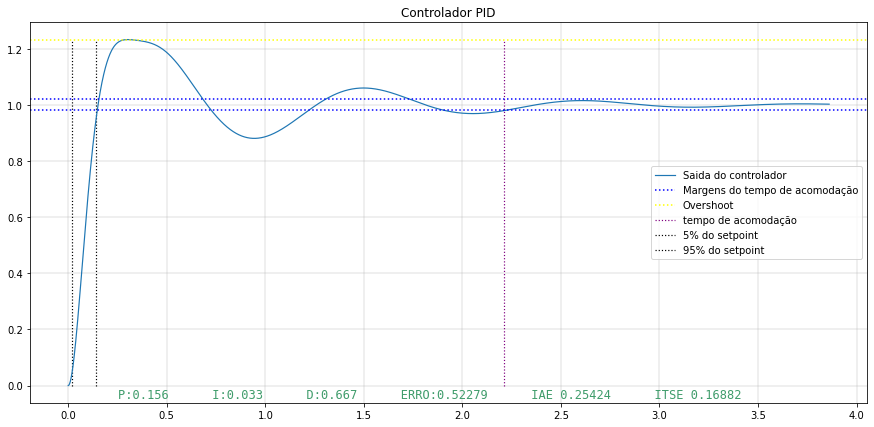

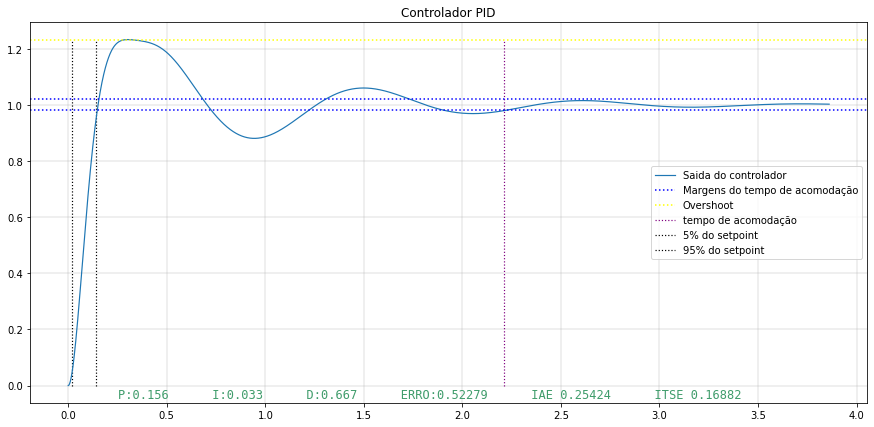

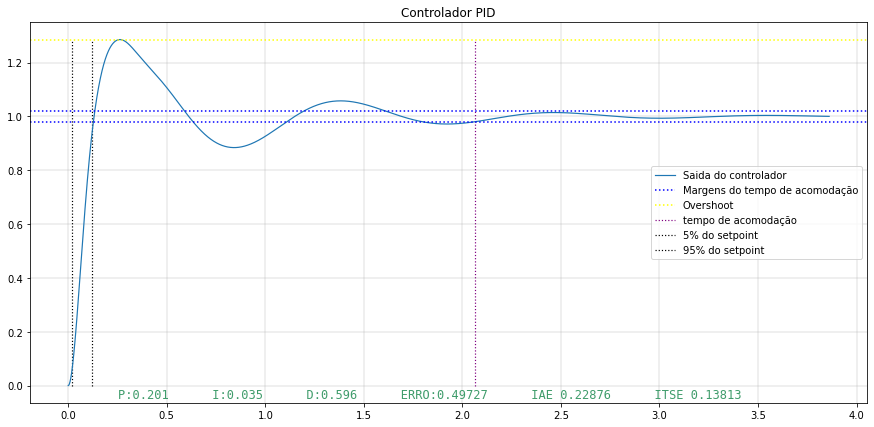

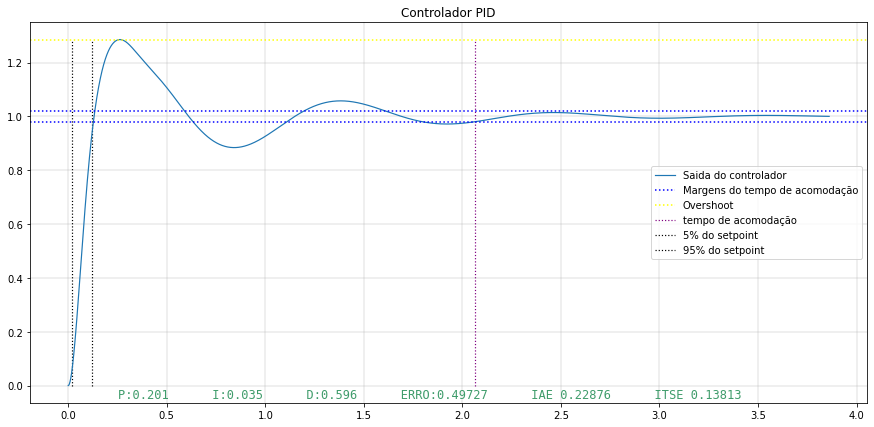

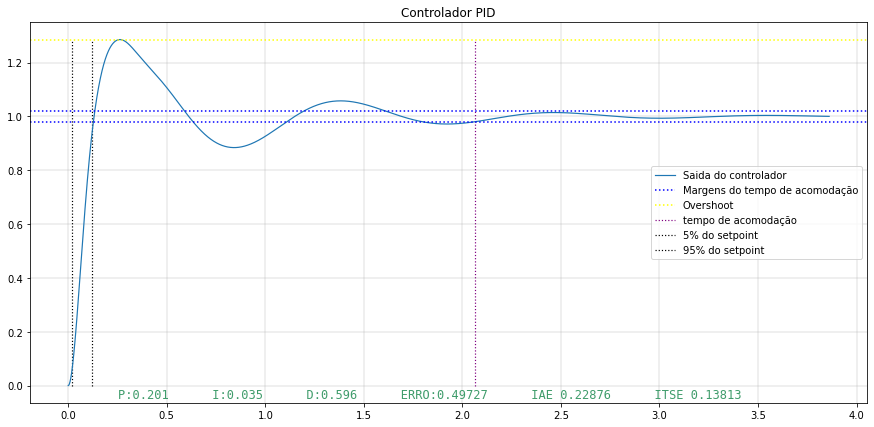

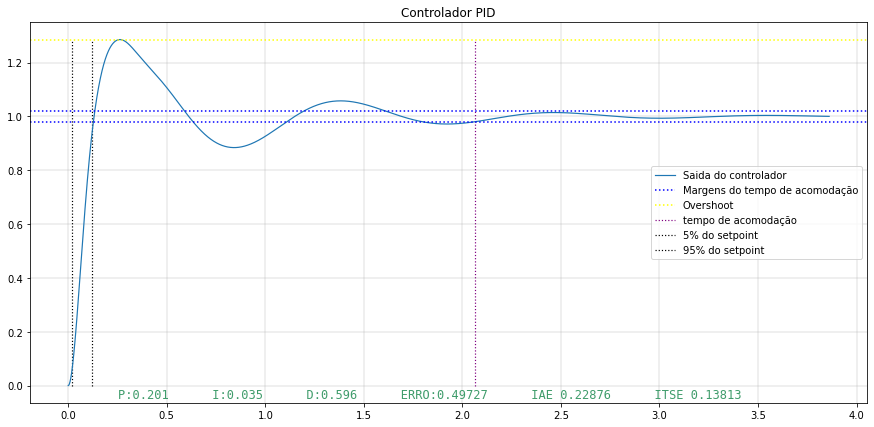

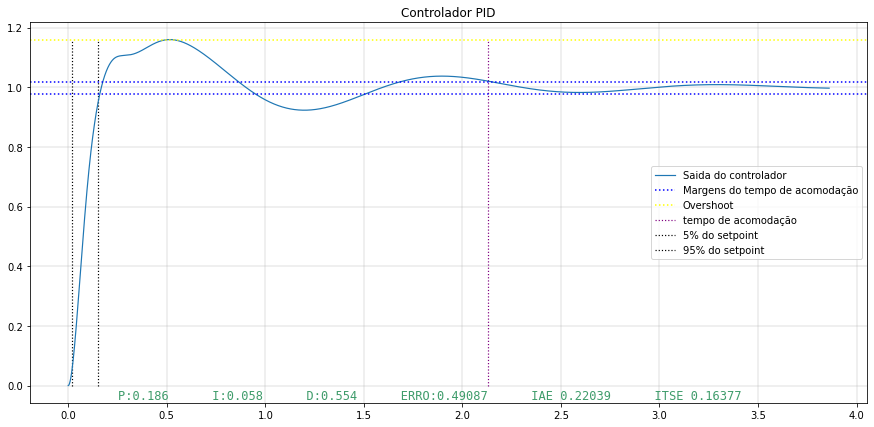

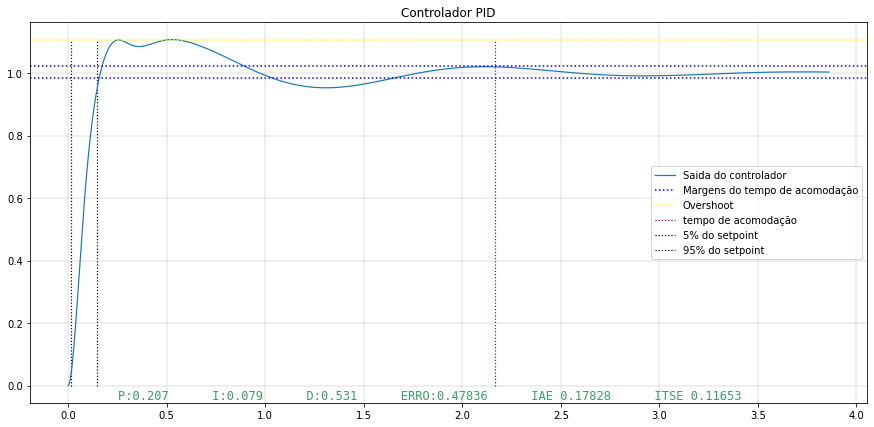

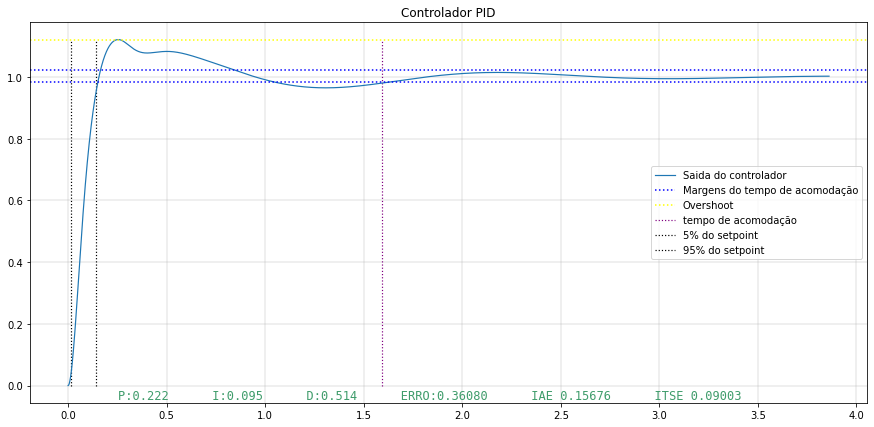

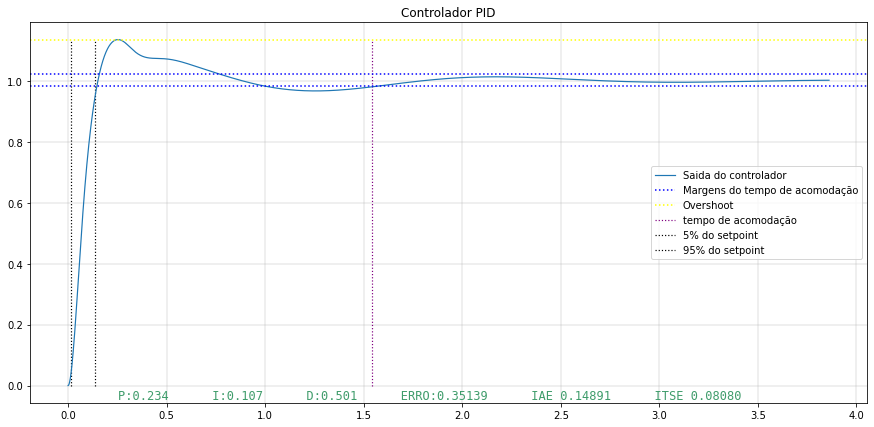

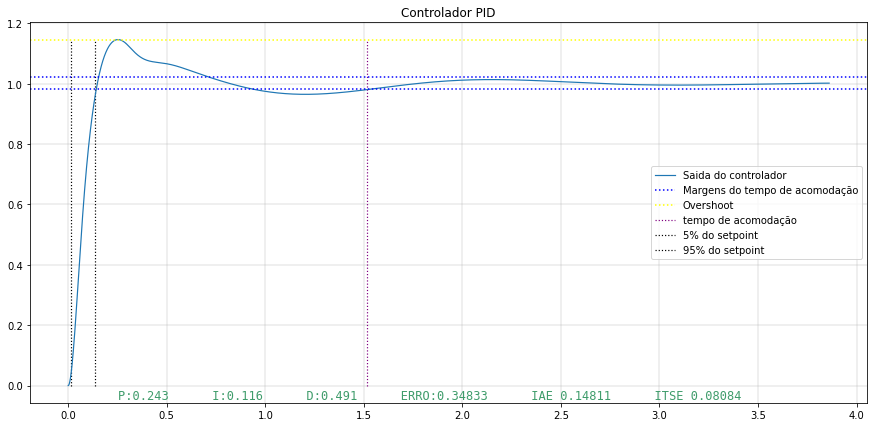

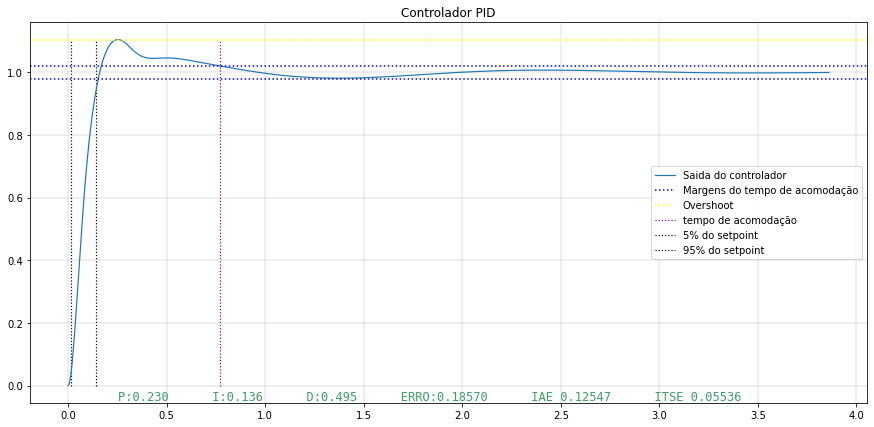

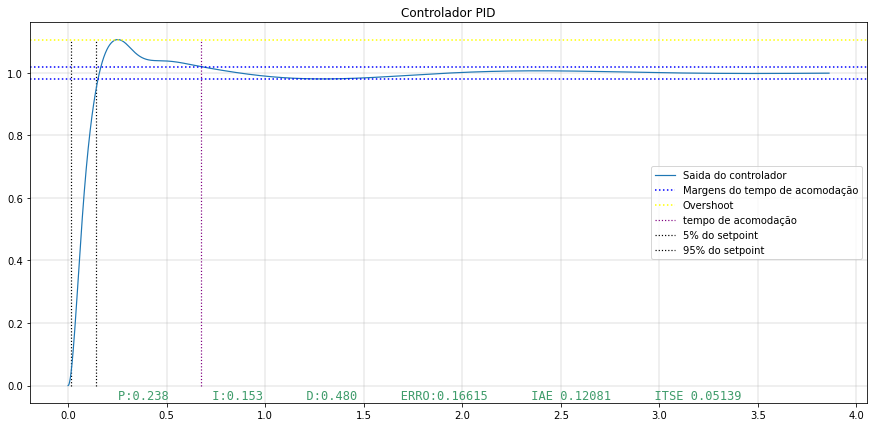

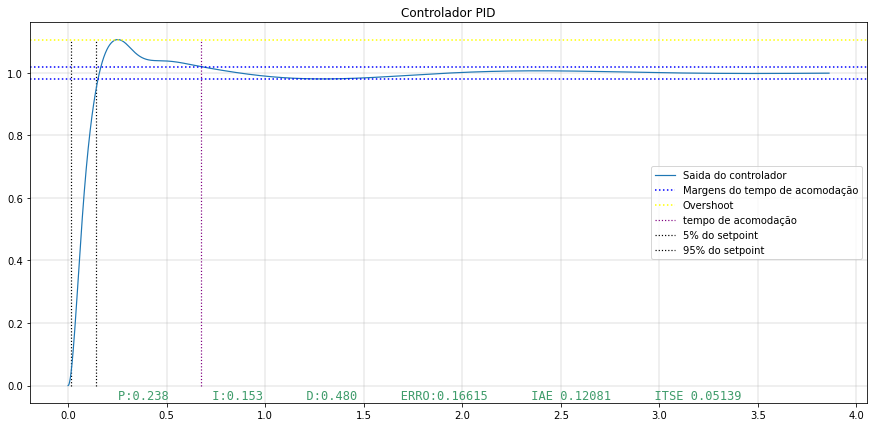

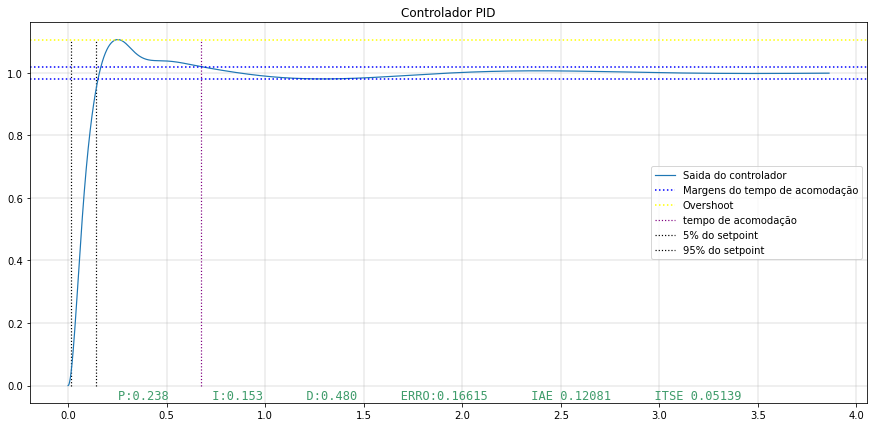

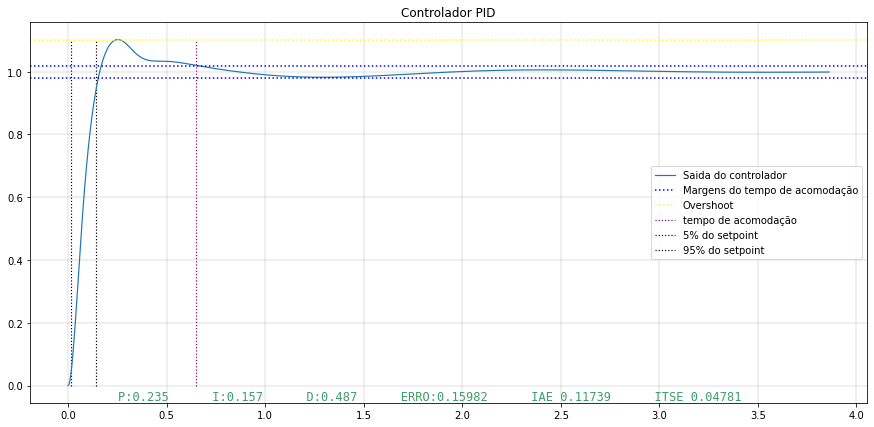

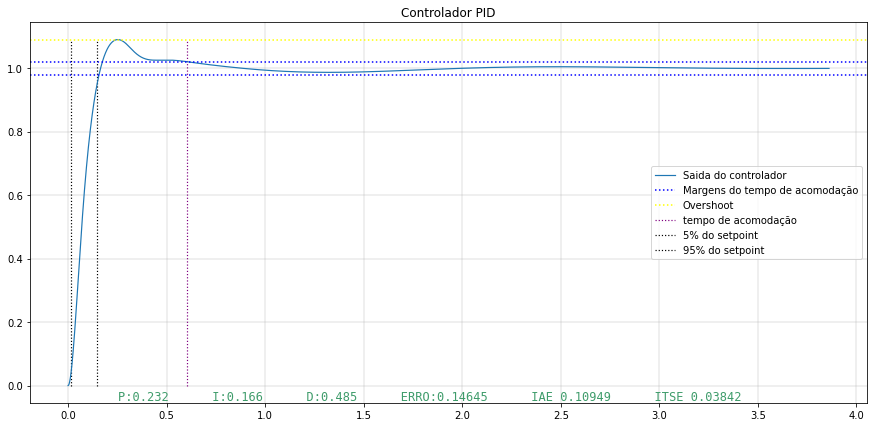

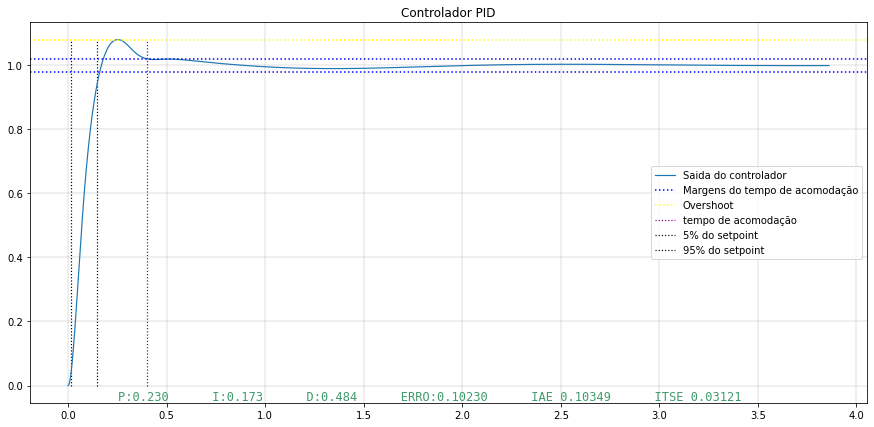

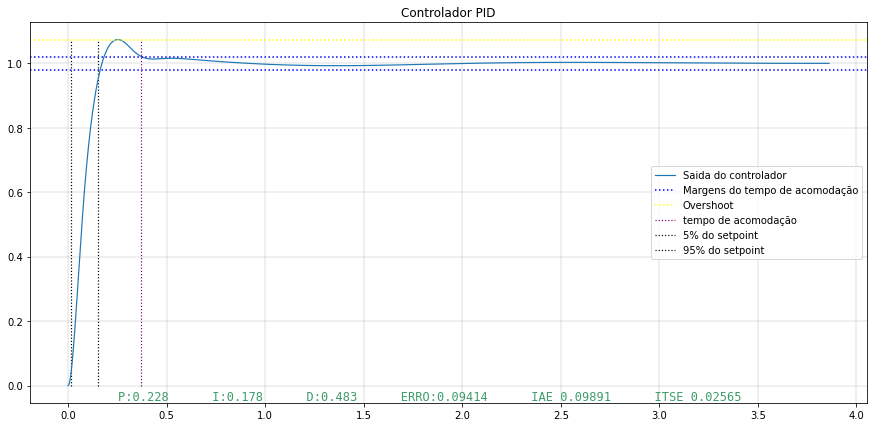

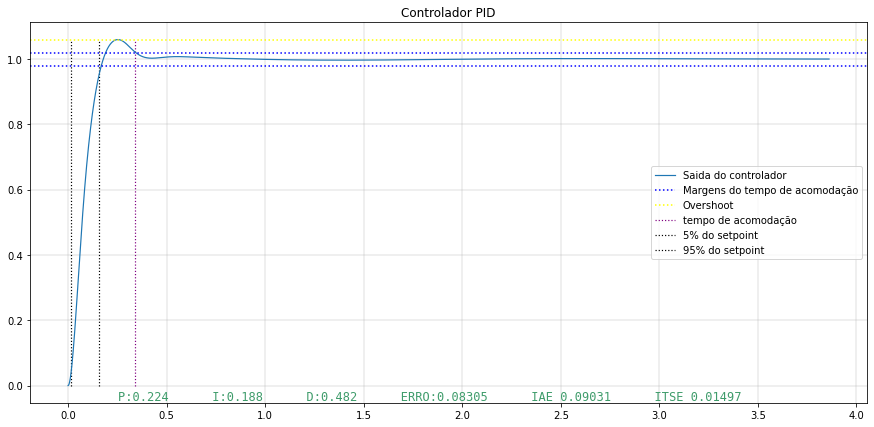

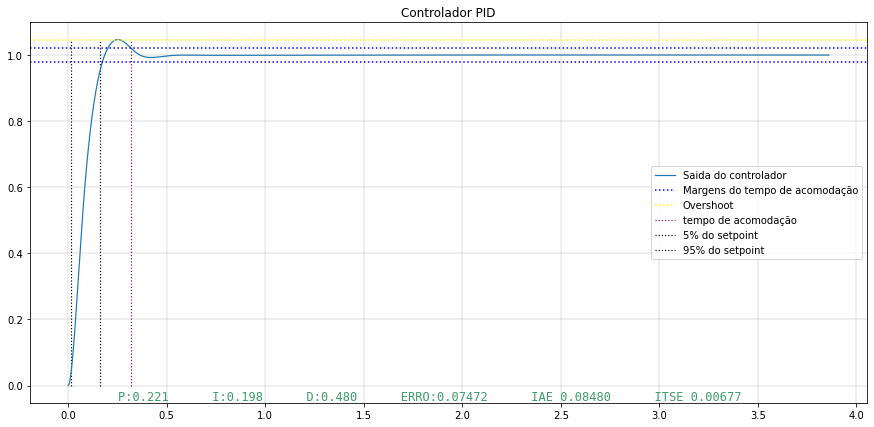

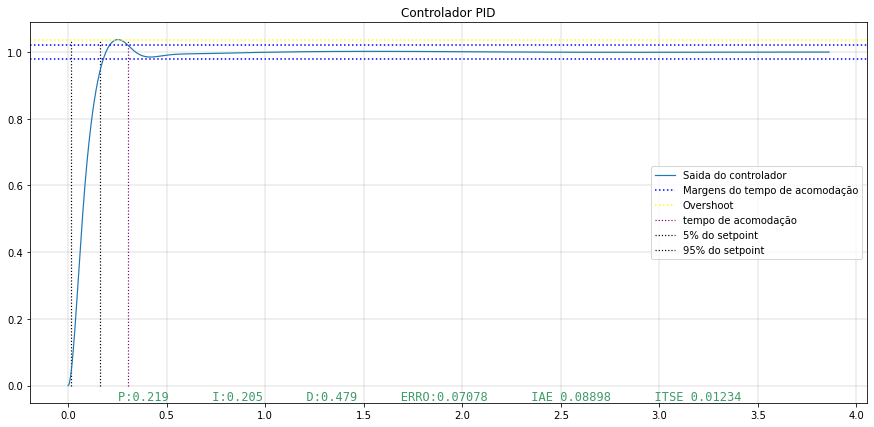

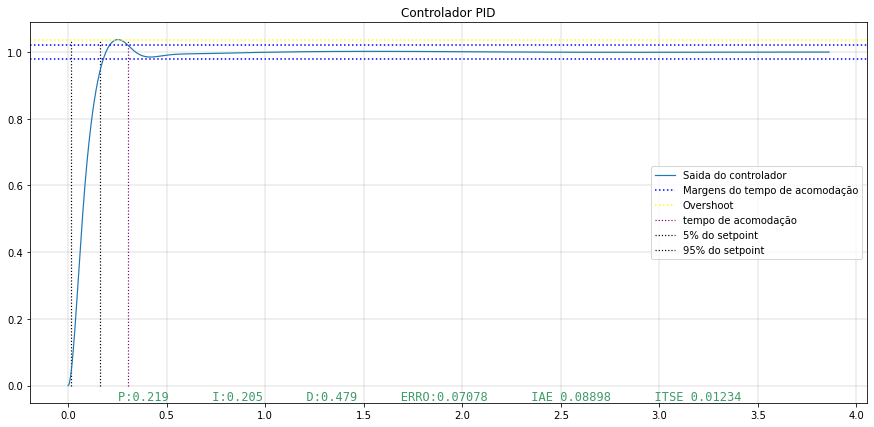

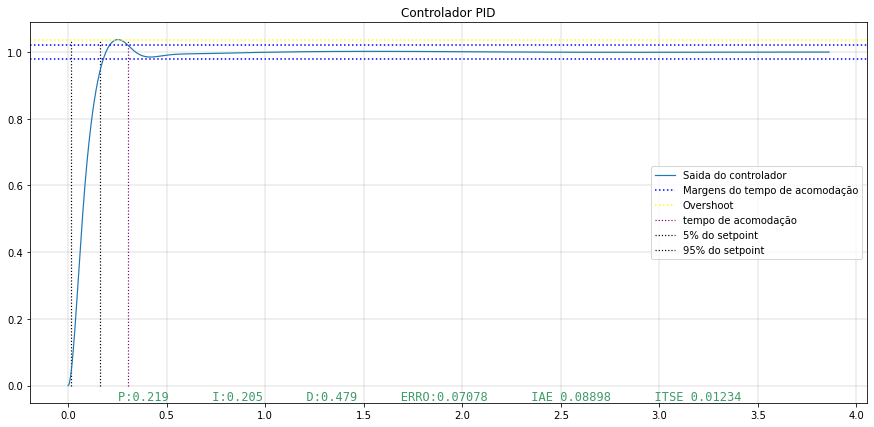

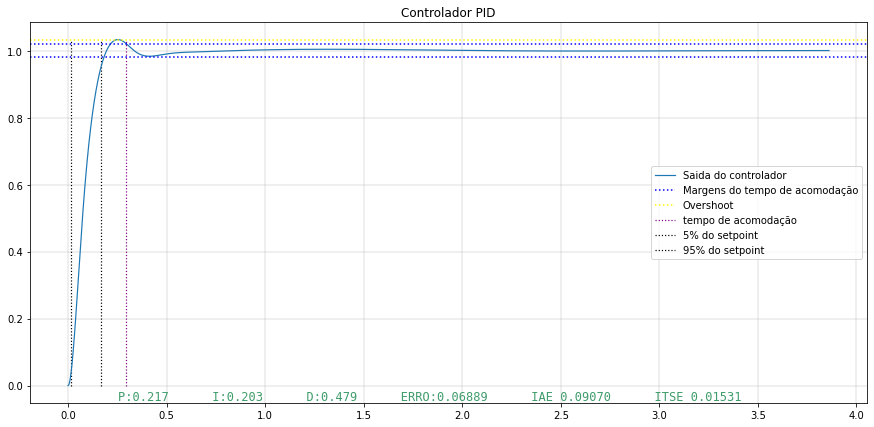

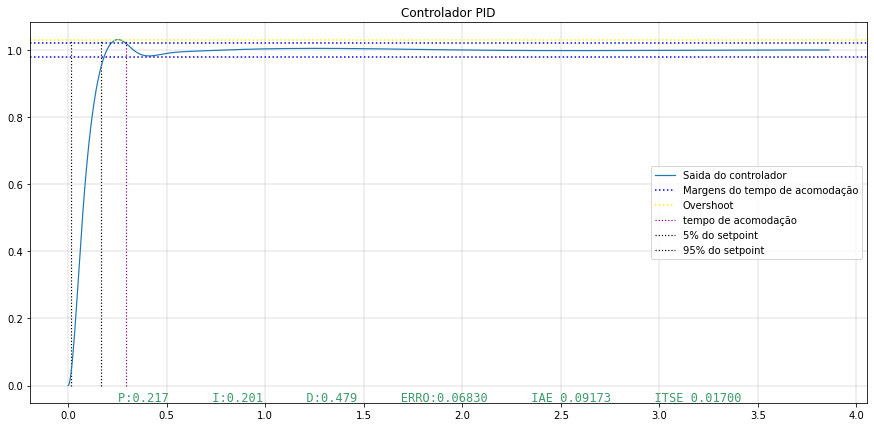

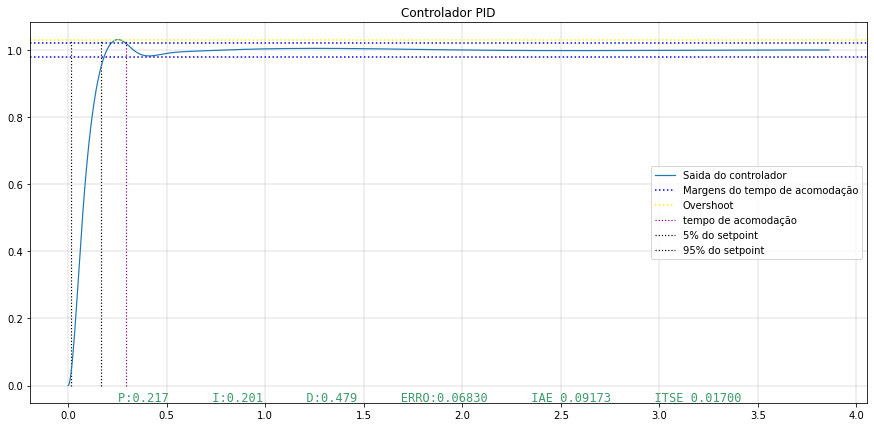

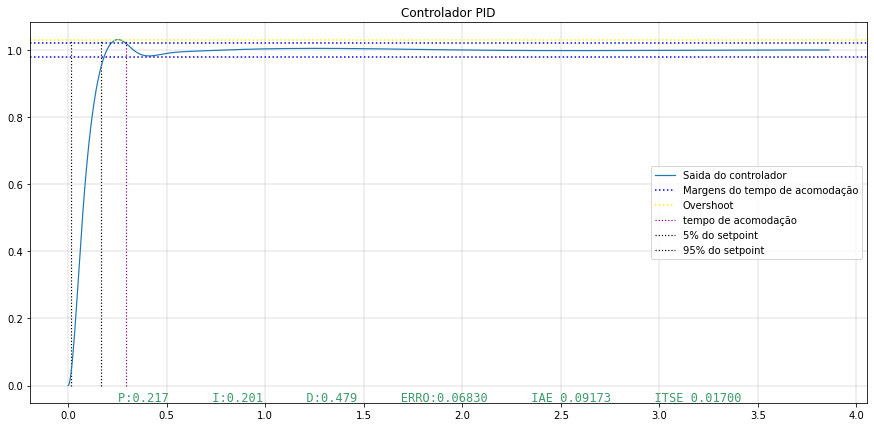

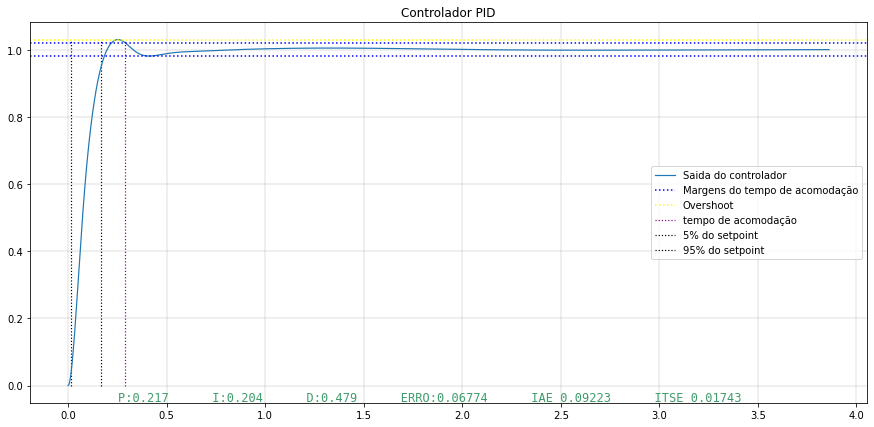

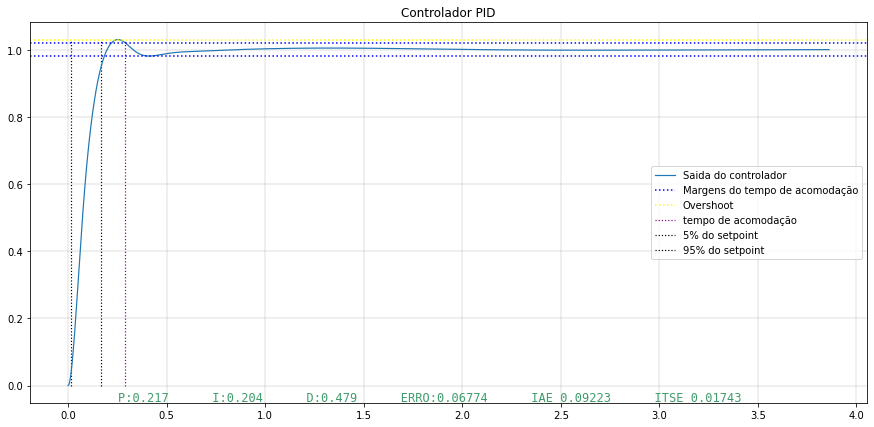

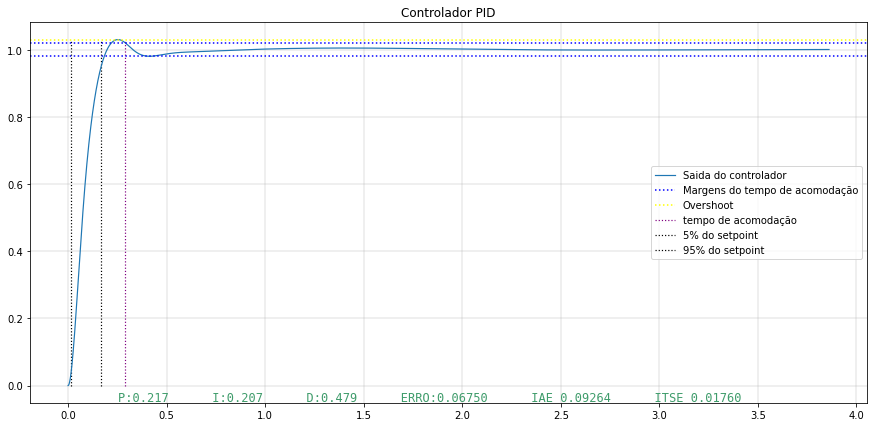

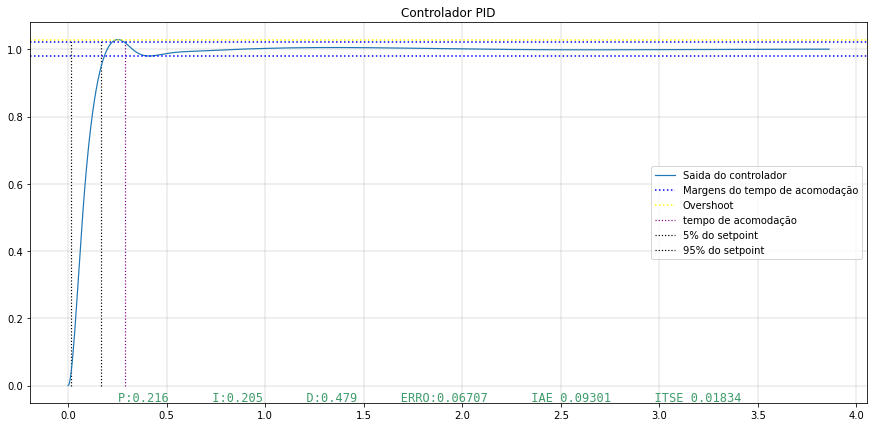

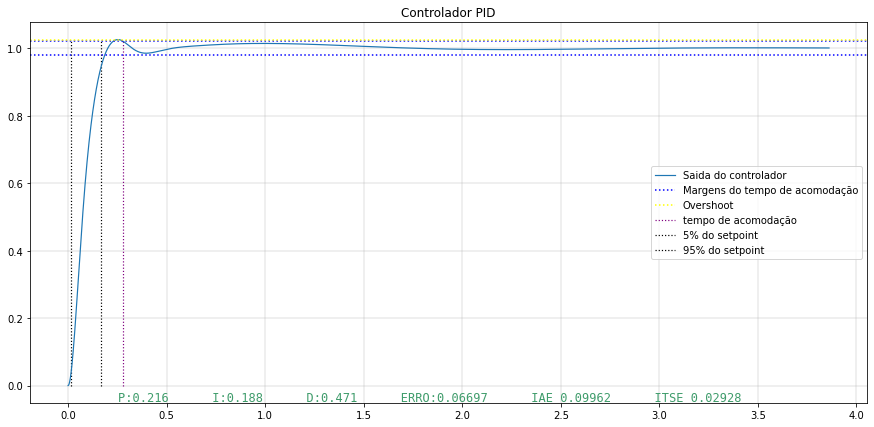

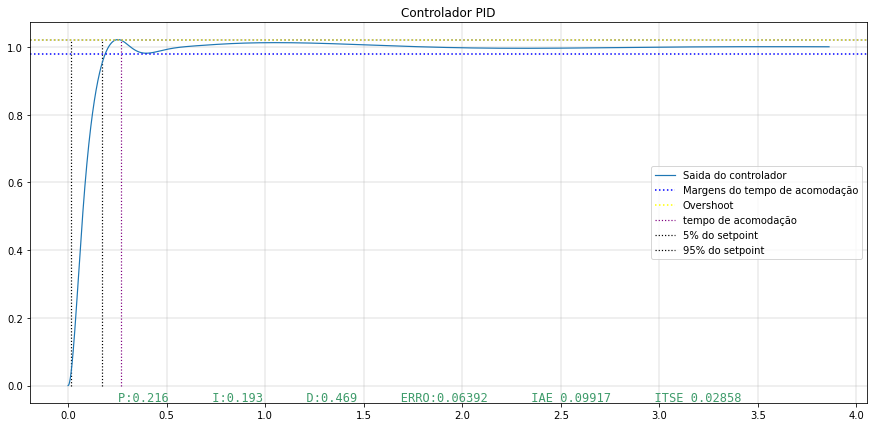

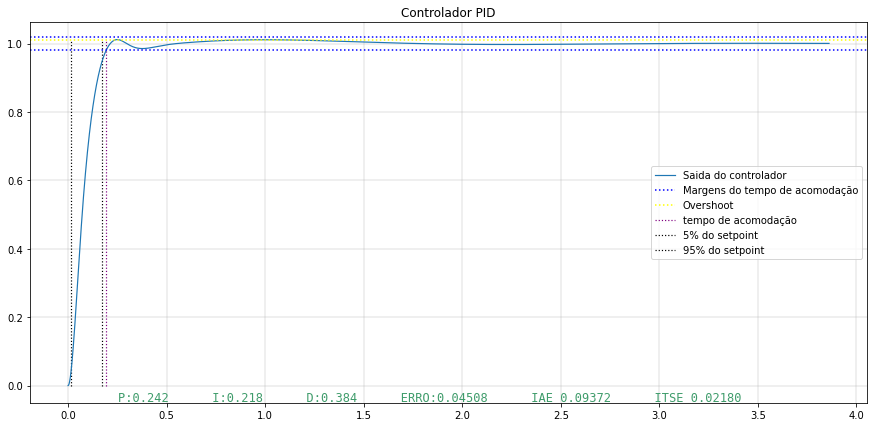

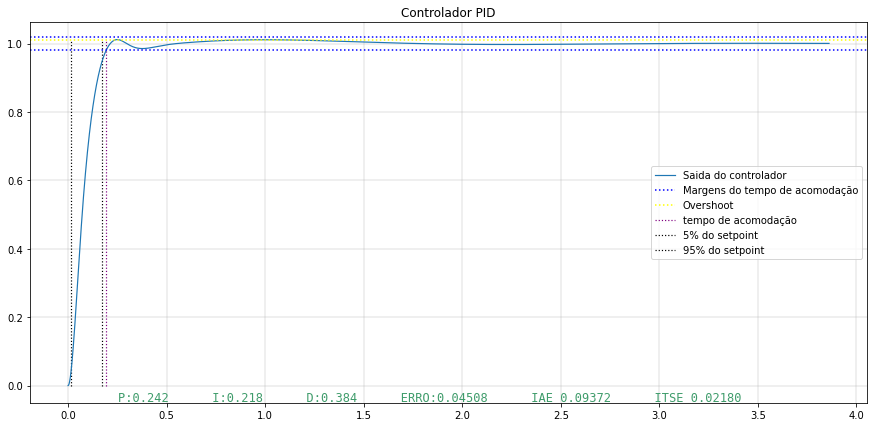

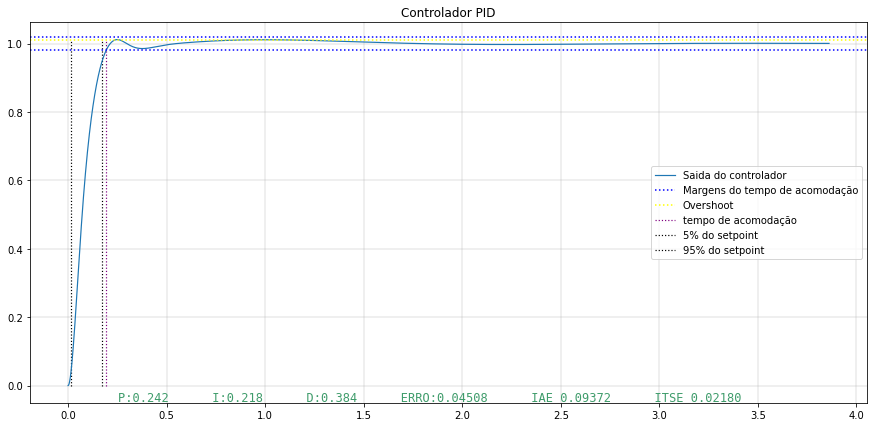

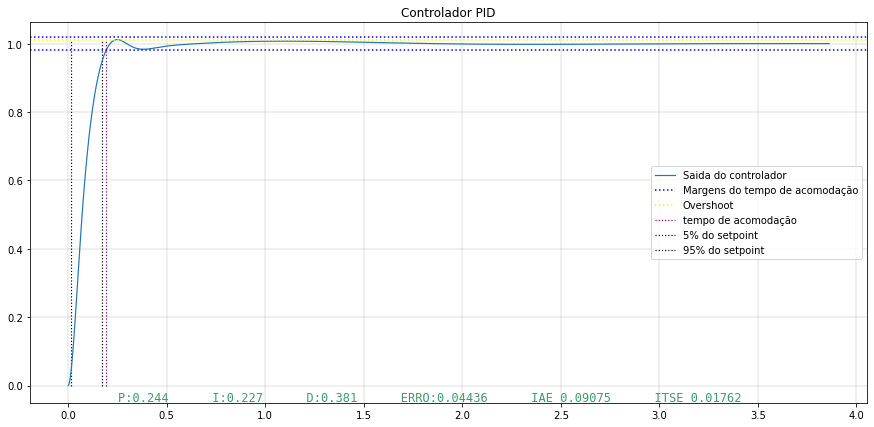

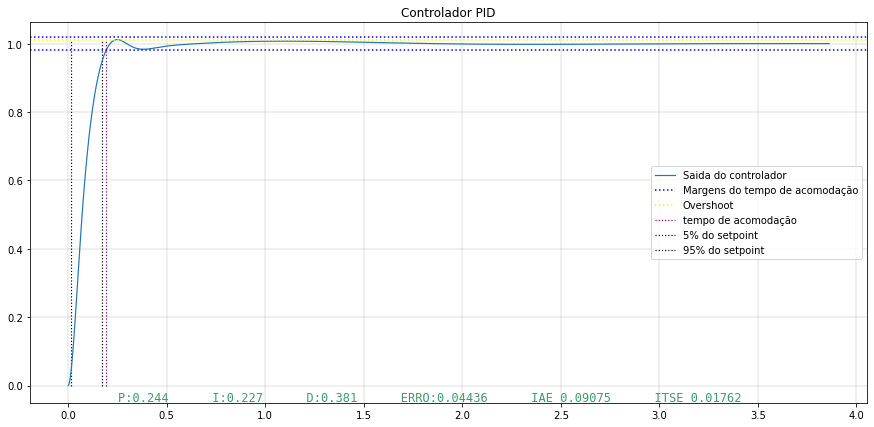

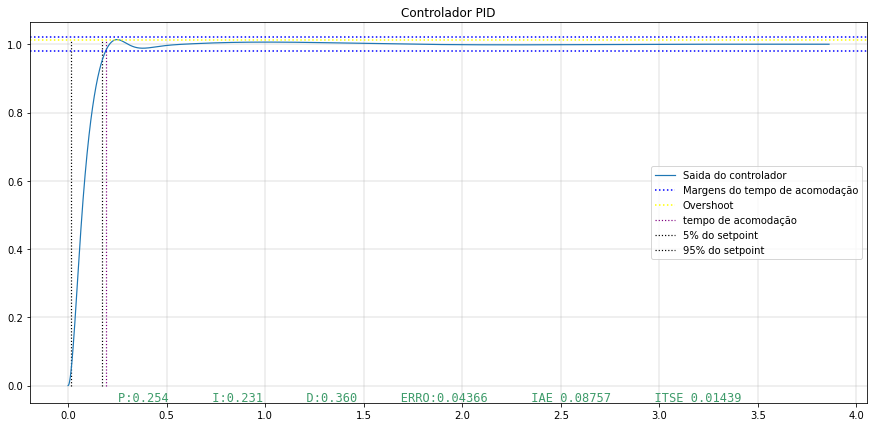

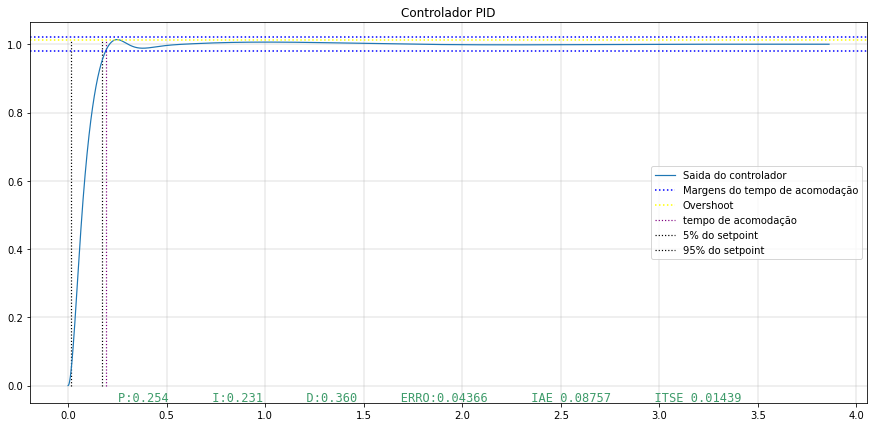

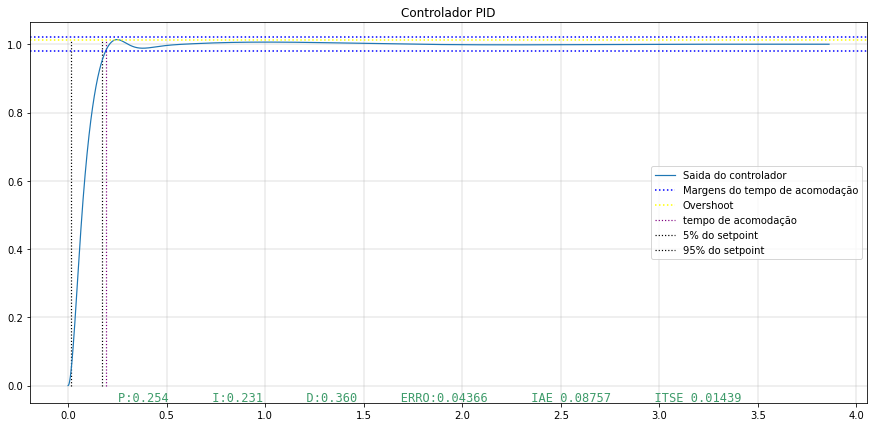

TypeError: plot_pid() got an unexpected keyword argument 'fim'

In [4]:
ini = time()

# w = 0.75 # fator de inercia
# c1 = 1.0  # fator cognitivo
# c2 = 0.5 # fator social

w = 0.75 # fator de inercia
c1 = 1.0  # fator cognitivo
c2 = 0.6 # fator social
 
n_part = 10 # numero de particulas
parada = 0.001 # critério de parada

sistema = list()

particulas = PSO.inicializate(n_part)  

sistema = PSO.update_sistem(sistema, particulas, w, c1, c2, parada, pid_param)
fim = time()

print(f"< Tempo total de execução: {round((fim-ini)/60, 2)}min")

In [ ]:
sistema2df(sistema,'C:\\Users\\vitor\\Documents\\GitHub\\IC-IT\\resultados')